### Place to try I feel ideas in order to build a better intuition.



In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_utils import *
import baseline
import current

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

train_x, train_y, test_x, test_y, classes = load_flatten_and_standarized_data()

print('\nSetup complete!')


Setup complete!


In [2]:
# Current
# - He initialization
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
# learning_rate = 0.0075
learning_rate = 0.003
tic = time.process_time()
parameters, costs, accuracies = current.L_layer_model(train_x, train_y, test_x, test_y, layers_dims, learning_rate=learning_rate, num_iterations = 1500, initialization='he', verbose = True)
toc = time.process_time()
processing_time = (toc - tic)
print('Processing time: ', str(processing_time) )

pred_train = current.predict(train_x, train_y, parameters)
pred_test = current.predict(test_x, test_y, parameters)

# plot_costs(costs, learning_rate)

he
Cost after iteration 0: 0.6855596013071792
Cost after iteration 100: 0.5349104627660822
Cost after iteration 200: 0.48276898620037934
Cost after iteration 300: 0.4380240329470234
Cost after iteration 400: 0.41488184120673155
Cost after iteration 500: 0.35121634834126103
Cost after iteration 600: 0.3199186616041448
Cost after iteration 700: 0.29208183577938784
Cost after iteration 800: 0.22861453524613493
Cost after iteration 900: 0.22816935920170645
Cost after iteration 1000: 0.13814783684058796
Cost after iteration 1100: 0.10768865106115172
Cost after iteration 1200: 0.08331184562434252
Cost after iteration 1300: 0.06883968771163419
Cost after iteration 1400: 0.05957687508341586
Cost after iteration 1499: 0.051885576955272
Processing time:  94.984375
Accuracy: 0.9999999999999998
Accuracy: 0.7200000000000001


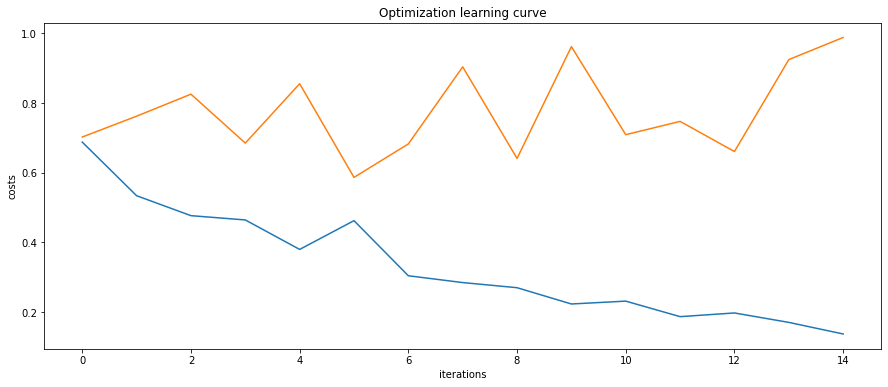

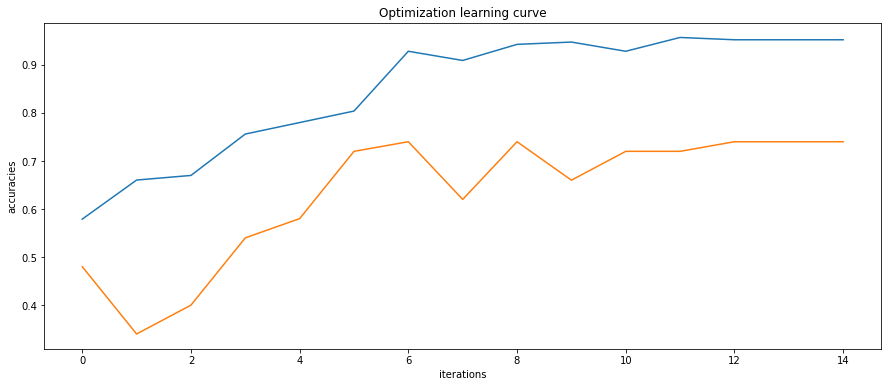

In [3]:

# plot_costs(costs['test'], learning_rate)
# plot_costs(costs['training'], learning_rate)
def plot_perfomance_learning_curve(accuracies):
    plt.plot(np.squeeze(accuracies['training']))
    plt.plot(np.squeeze(accuracies['test']))
    plt.ylabel('accuracies')
    plt.xlabel('iterations')
    plt.title('Optimization learning curve')
    plt.show()

def plot_optimization_learning_curve(costs):
    plt.plot(np.squeeze(costs['training']))
    plt.plot(np.squeeze(costs['test']))
    plt.ylabel('costs')
    plt.xlabel('iterations')
    plt.title('Optimization learning curve')
    plt.show()

plot_optimization_learning_curve(costs)
plot_perfomance_learning_curve(accuracies)


In [3]:
# Regularization

layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
learning_rate = 0.0075
# learning_rate = 0.003
tic = time.process_time()
parameters, costs, accuracies = current.L_layer_model(train_x, train_y, test_x, test_y, layers_dims, learning_rate=learning_rate, num_iterations = 500, initialization='he', lambd=0.7, keep_prob=1, verbose = True)
toc = time.process_time()
processing_time = (toc - tic)
print('Processing time: ', str(processing_time) )

pred_train = current.predict(train_x, train_y, parameters)
pred_test = current.predict(test_x, test_y, parameters)

# plot_costs(costs, learning_rate)

he
Cost after iteration 0: 0.7947875080997573
Cost after iteration 100: 0.6438815954801924
Cost after iteration 200: 0.6463834324196996
Cost after iteration 300: 0.5881661446735981
Cost after iteration 400: 0.4629864100979043
Cost after iteration 499: 0.4119789082795913
Processing time:  31.40625
Accuracy: 0.880382775119617
Accuracy: 0.78


In [2]:
# Dropout

layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
learning_rate = 0.0075
# learning_rate = 0.003
tic = time.process_time()
parameters, costs, accuracies = current.L_layer_model(train_x, train_y, test_x, test_y, layers_dims, learning_rate=learning_rate, num_iterations = 1500, initialization='he', lambd=0, keep_prob=0.9, verbose = True)
toc = time.process_time()
processing_time = (toc - tic)
print('Processing time: ', str(processing_time) )

pred_train = current.predict(train_x, train_y, parameters)
pred_test = current.predict(test_x, test_y, parameters)

# plot_costs(costs, learning_rate)

he
Cost after iteration 0: 0.687989104698421
Cost after iteration 100: 0.5339702264063632
Cost after iteration 200: 0.4766553976348627
Cost after iteration 300: 0.4643586308960509
Cost after iteration 400: 0.3796624849218452
Cost after iteration 500: 0.46230163707093896
Cost after iteration 600: 0.3040123766294905
Cost after iteration 700: 0.2844450522691438
Cost after iteration 800: 0.26969758271055816
Cost after iteration 900: 0.22291943492751548
Cost after iteration 1000: 0.2311278127921994
Cost after iteration 1100: 0.1865464680750694
Cost after iteration 1200: 0.19714551757543655
Cost after iteration 1300: 0.17006156674545883
Cost after iteration 1400: 0.13677475129733932
Cost after iteration 1499: 0.13329335508947593
Processing time:  94.21875
Accuracy: 0.9952153110047844
Accuracy: 0.76


In [9]:
index = 0
max = 0
found = 0
for item in accuracies['test']:
    if(item > max):
        max = item
        found = index
    index += 1

print(max, found)

0.78 5


Cost after iteration 0: 0.7717493284237686
Processing time:  0.09375
Accuracy: 0.5119617224880383
Accuracy: 0.42000000000000004


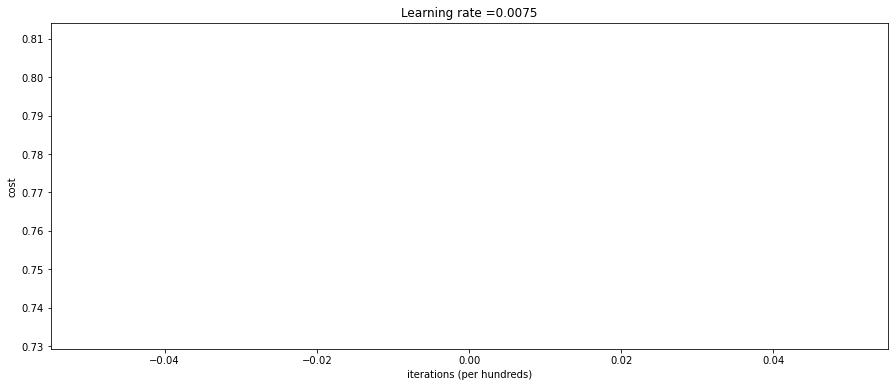

In [2]:
# Baseline
# Processing time:  93.890625
# Train accuracy: 0.9808612440191385
# Test  accuracy: 0.8200000000000001
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
learning_rate = 0.0075

tic = time.process_time()
parameters, costs = baseline.L_layer_model(train_x, train_y, layers_dims, learning_rate=learning_rate, num_iterations = 1500, print_cost = True)
toc = time.process_time()
processing_time = (toc - tic)
print('Processing time: ', str(processing_time) )

pred_train = baseline.predict(train_x, train_y, parameters)
pred_test = baseline.predict(test_x, test_y, parameters)

plot_costs(costs, learning_rate)


In [7]:
# Gradient checking
# layers_dims = [12288, 20, 7, 5, 1]
layers_dims = [1, 2, 1]
parameters = current.initialize_parameters_deep_he(layers_dims)

subset_train_x = train_x[0:1, 0:1]
subset_train_y = train_y[:, 0:1]

AL, cache = current.L_model_forward(subset_train_x, parameters)
gradients = current.L_model_backward(AL, subset_train_y, cache)
difference, gradapprox, gradvector = current.gradient_check_n(parameters, gradients, subset_train_x, subset_train_y, layers_dims, 1e-7, True)

assert not(type(difference) == np.ndarray), "You are not using np.linalg.norm for numerator or denominator"



he
caches
2
current_cache 1
current_cache 0
num_parameters: 7
Your backward propagation works perfectly fine! difference = 1.9285124645550787e-09


### Debuging gradient checking error

I will try to use the same testcase from Gradient_checking notebook.
Also I used the they forward and backward propagation model as golden models.

I compared golden and current models step by step. First the forward propagation output and cache values, after the cost calculation and the and output gradients from backward propagation. At the end I detected a small difference ( < 1e-10 ) in some values probable due some floating point approximations.

After being sure that the current.model implementation has no bug I started to look at gradient checking code.
I found a logic error in utility functions used to serialize and deserialize the parameters.
Now, after fixing it, I am sure that implemented backward propagation works perfectly.



In [3]:
def gradient_check_n_test_case(): 
    np.random.seed(1)
    x = np.random.randn(4,3)
    y = np.array([1, 1, 0])
    W1 = np.random.randn(5,4) 
    b1 = np.random.randn(5,1) 
    W2 = np.random.randn(3,5) 
    b2 = np.random.randn(3,1) 
    W3 = np.random.randn(1,3) 
    b3 = np.random.randn(1,1) 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    
    return x, y, parameters

def golden_relu(x):
    s = np.maximum(0, x)
    return s

def golden_sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s


def golden_forward_propagation_n(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = golden_relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = golden_relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = golden_sigmoid(Z3)

    # Cost
    log_probs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1. / m * np.sum(log_probs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

def golden_backward_propagation_n(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1. / m * np.dot(dZ3, A2.T)
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1. / m * np.dot(dZ2, A1.T)
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1. / m * np.dot(dZ1, X.T)
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients


def dut_L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    grads['dAL' + str(L)] = dAL

    print(str(L))
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    # current_cache = caches[L-1]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = current.linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    # grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = current.linear_activation_backward(dAL, current_cache, activation = "sigmoid")

    print('L', str(L))
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        print(grads.keys())
        print('l', str(l))
        dA_prev_temp, dW_temp, db_temp = current.linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        # grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

X, Y, parameters = gradient_check_n_test_case()

golden_cost, golden_cache = golden_forward_propagation_n(X, Y, parameters)
golden_gradients = golden_backward_propagation_n(X, Y, golden_cache)

dut_AL, dut_cache = current.L_model_forward(X, parameters)
dut_cost = current.compute_cost(dut_AL, Y.reshape(-1,1).T)
dut_gradients = dut_L_model_backward(dut_AL, Y.reshape(-1,1).T, dut_cache)

# golden_difference = current.gradient_check_n(parameters, golden_gradients, X, Y.reshape(-1,1).T, 1e-7, True)
layer_dims = [4, 5, 3, 1]
dut_difference, dut_gradapprox_vector, dut_grad = current.gradient_check_n(parameters, dut_gradients, X, Y.reshape(-1,1).T, layer_dims, 1e-7, True)
# dut_gradapprox_params = vector_to_dictionary(dut_gradapprox_vector, layer_dims)

# golden_difference, golden_gradapprox_vector, golden_grad = current.gradient_check_n(parameters, golden_gradients, X, Y.reshape(-1,1).T, layer_dims, 1e-7, True)






3
L 3
dict_keys(['dAL3', 'dA2', 'dW3', 'db3'])
l 1
dict_keys(['dAL3', 'dA2', 'dW3', 'db3', 'dA1', 'dW2', 'db2'])
l 0
num_parameters: 47
Your backward propagation works perfectly fine! difference = 1.1890417879258395e-07
